In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# MPG.csv
## 0. Очистите таблицу от строк с пропусками значений
## 1. Докажите, что чем больше цилиндров у мотора, тем больше потребление у машины ( доказательством будет график столбичный)
## 2. Покажите, что имеется тенденция к переходу на более легкие и менее мощные машины (график)
## 3. Напишите название машины, у который был максимальный вес в категории машин до 150 лошадиных сил
## 4. Напишите из какой страны машин больше всего
## 5. Графические покажите, машин какой марки больше всего в таблице
## 6. Докажите что машины в США самые прожорливые (график столбичный)

# 0. Очистите таблицу от строк с пропусками значений

In [19]:
df = pd.read_csv('MPG.csv', sep=',')
df.dropna(inplace=True, axis=0)
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[392 rows x 9 columns]

# 1. Докажите, что чем больше цилиндров у мотора, тем больше потребление у машины ( доказательством будет график столбичный)

<AxesSubplot:xlabel='cylinders'>

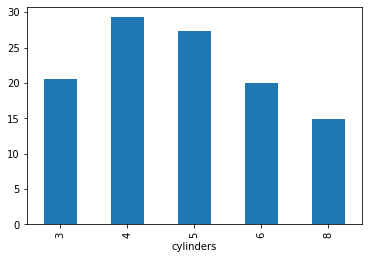

In [55]:
df.groupby('cylinders')['mpg'].mean().plot(kind='bar')

# 2. Покажите, что имеется тенденция к переходу на более легкие и менее мощные машины (график)

# 3. Напишите название машины, у который был максимальный вес в категории машин до 150 лошадиных сил

In [30]:
mass = df['horsepower'] < 150
df1 = df[mass]
df1

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
14   24.0          4         113.0        95.0    2372          15.0   
15   22.0          6         198.0        95.0    2833          15.5   
16   18.0          6         199.0        97.0    2774          15.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
4            70     usa                ford torino  
14           70   japan      toyota corona mark ii  
15           70     usa            plymouth duster  
16           70     usa                 amc hornet  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[325 rows x 9 columns]

In [31]:
df1.groupby('name')['weight'].max().idxmax()

'ford ltd'

# 4. Напишите из какой страны машин больше всего

In [34]:
df['origin'].value_counts().idxmax()

'usa'

# 5. Графические покажите, машин какой марки больше всего в таблице

In [92]:
strr = df['name'].str.split(' ', expand=True)
strr.rename(columns = {0:'car brand'}, inplace=True)
for i in range(1,6):
    del strr[i]
strr

car brand
0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
..         ...
393       ford
394         vw
395      dodge
396       ford
397      chevy

[392 rows x 1 columns]

<AxesSubplot:xlabel='car brand'>

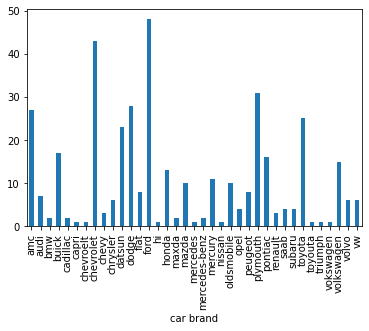

In [94]:
strr.groupby('car brand').size().plot(kind='bar')

# 6. Докажите что машины в США самые прожорливые (график столбичный)

<AxesSubplot:xlabel='origin'>

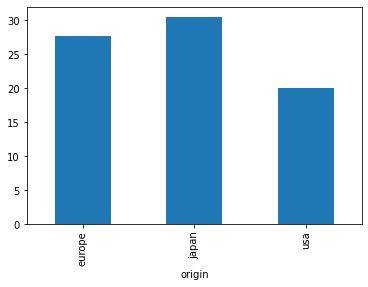

In [48]:
df.groupby('origin')['mpg'].mean().plot(kind='bar')


# Чем меньше показатель mpg, тем болше потребляет автомобиль. По данному графику видно, что в США меньший показатель, что означает большее потребление

# tips.csv

In [60]:
df2 = pd.read_csv('tips.csv', sep=',')
df2

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

# 1. Какой был самый большой счет

In [62]:
df2['total_bill'].max()

50.81

Самый большой счет = 50.81

# 2. Какие были самые большие чаевые среди женщин

In [65]:
fem = df2['sex']=='Female'
df2[fem]['tip'].max()

6.5

Cамые большие чаевые среди женщин = 6.5

# 3. Курил ли человек, оплативший самый большой счет

In [69]:
df2.groupby('smoker')['total_bill'].max().idxmax()

'Yes'

# 4. Сколько всего было выплачено чаевых от столиков на 2 места

In [73]:
two = df2['size']==2
df2[two]['tip'].sum()

402.84000000000003

всего было выплачено чаевых от столиков на 2 места = 402.84000000000003

# 5. В какой день недели куряющие люди дают больше чаевых (столбичная диаграмма)

<AxesSubplot:xlabel='day'>

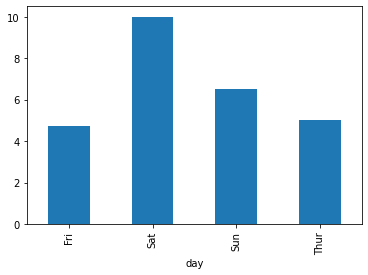

In [79]:
smoke = df2['smoker'] == 'Yes'
df2[smoke].groupby('day')['tip'].max().plot(kind='bar')

# 6. Кто больше платит чаевых, курящие или не куряющие

In [86]:
smoke = df2['smoker'] == 'Yes'
smoking_result = df2[smoke]['tip'].sum() #платят курящие всего

In [87]:
smoke = df2['smoker'] == 'No'
notsmoking_result = df2[smoke]['tip'].sum() #платят некурящие всего

In [88]:
if smoking_result > notsmoking_result:
    print('Курящие платят больше')
else:
    print('Курящие платят меньше')

Курящие платят меньше


# 7. В какое время дня в пятницу было занято максимальное количество трехместных столиков

In [90]:
friday = (df2['day'] == 'Fri') & (df2['size'] == 3)
df2[friday]['time'].max()

'Lunch'